In [ ]:
# ================================================================================================
# CUSTOMER SATISFACTION ANALYSIS - E-COMMERCE PERFORMANCE OPTIMIZATION
# ================================================================================================
# 
# PROJECT OVERVIEW:
# This project analyzes e-commerce customer satisfaction patterns to identify key drivers
# of customer loyalty, purchase behavior, and service quality impact on business performance.
# We'll evaluate customer demographics, purchase patterns, ratings, and loyalty metrics
# to develop actionable strategies for improving customer experience and business growth.
#
# KEY OBJECTIVES:
# 1. Analyze customer demographics and purchase behavior patterns
# 2. Evaluate service quality ratings across multiple touchpoints
# 3. Identify factors driving customer satisfaction and loyalty
# 4. Examine relationship between ratings and purchase behavior
# 5. Develop customer segmentation strategies
# 6. Provide actionable recommendations for business improvement
#
# BUSINESS IMPACT:
# - Optimize customer experience across all touchpoints
# - Increase customer satisfaction and retention rates
# - Drive revenue growth through improved service quality
# - Support data-driven decision making for service improvements
# ================================================================================================

# Import required libraries for comprehensive data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set visualization style for professional charts
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🛍️ CUSTOMER SATISFACTION ANALYSIS INITIATED")
print("=" * 50)

In [ ]:
# ================================================================================================
# SECTION 1: DATA LOADING AND INITIAL EXPLORATION
# ================================================================================================
# 
# OBJECTIVE: Load and explore the e-commerce customer satisfaction dataset
# 
# DATASET OVERVIEW:
# - Customer demographics (Age, Gender)
# - Purchase behavior (Amount, Frequency)
# - Service ratings (Product Quality, Delivery, Customer Service, Website)
# - Business metrics (Return Rate, Discount Usage, Loyalty Program)
# ================================================================================================

print("\n" + "="*60)
print("📊 DATA LOADING AND INITIAL EXPLORATION")
print("="*60)

# Load the e-commerce customer satisfaction dataset
# This dataset contains customer demographics, purchase behavior, and satisfaction ratings
data = pd.read_csv("E-commerce_NPA_Dataset.csv")

print("📈 Dataset Successfully Loaded!")
print(f"📋 Data Shape: {data.shape}")
print(f"👥 Total Customers: {data.shape[0]}")
print(f"📊 Features Available: {data.shape[1]}")

# Display basic dataset information
print(f"\n🔍 Dataset Information:")
print(f"• Total Records: {len(data):,}")
print(f"• Features: {len(data.columns)}")
print(f"• Memory Usage: {data.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n📋 Column Overview:")
for i, col in enumerate(data.columns, 1):
    print(f"{i:2d}. {col}")

print("\n🎯 Sample Data Preview:")
print(data.head())

In [ ]:
# ================================================================================================
# SECTION 2: DATA QUALITY ASSESSMENT AND BASIC STATISTICS
# ================================================================================================
# 
# OBJECTIVE: Evaluate data quality and understand basic statistical properties
# 
# KEY ASSESSMENTS:
# - Missing value analysis
# - Data type validation
# - Statistical summaries
# - Outlier identification
# ================================================================================================

print("\n" + "="*60)
print("🔍 DATA QUALITY ASSESSMENT")
print("="*60)

# Check for missing values
missing_values = data.isnull().sum()
print("📋 Missing Values Analysis:")
if missing_values.sum() == 0:
    print("✅ No missing values detected - Excellent data quality!")
else:
    print(f"⚠️ Missing values found: {missing_values.sum()}")
    print(missing_values[missing_values > 0])

# Data type analysis
print(f"\n📊 Data Types Summary:")
print(data.dtypes.value_counts())

# Display comprehensive statistical summary
print(f"\n📈 Statistical Summary:")
print(data.describe().round(2))

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\n🔍 Duplicate Records: {duplicates}")
if duplicates > 0:
    print("⚠️ Duplicate records detected and should be handled")
else:
    print("✅ No duplicate records found")

# Unique values in categorical columns
categorical_cols = ['Gender', 'LoyaltyProgramMember']
print(f"\n🏷️ Categorical Variables Summary:")
for col in categorical_cols:
    if col in data.columns:
        unique_values = data[col].value_counts()
        print(f"\n{col}:")
        for val, count in unique_values.items():
            percentage = (count / len(data)) * 100
            print(f"  • {val}: {count:,} ({percentage:.1f}%)")

print(f"\n✅ Data Quality Assessment Complete!")

   CustomerID  Age  Gender  PurchaseAmount  PurchaseFrequency  \
0           1   38  Female      749.097626                 24   
1           2   30    Male      735.224916                 18   
2           3   55    Male     1145.520305                 22   
3           4   39  Female      925.460535                 14   
4           5   51    Male      108.359916                  9   

   ProductQualityRating  DeliveryTimeRating  CustomerServiceRating  \
0                     2                   1                      3   
1                     5                   4                      4   
2                     3                   5                      4   
3                     4                   3                      2   
4                     3                   3                      2   

   WebsiteEaseOfUseRating  ReturnRate  DiscountUsage LoyaltyProgramMember  
0                       5        0.12     135.392573                   No  
1                       5        0.3

In [ ]:
# ================================================================================================
# SECTION 3: CUSTOMER DEMOGRAPHICS ANALYSIS
# ================================================================================================
# 
# OBJECTIVE: Analyze customer demographic patterns and characteristics
# 
# DEMOGRAPHIC INSIGHTS:
# - Age distribution and segments
# - Gender distribution and behavior patterns
# - Loyalty program participation analysis
# ================================================================================================

print("\n" + "="*60)
print("👥 CUSTOMER DEMOGRAPHICS ANALYSIS")
print("="*60)

# Age analysis
age_stats = {
    'Mean Age': data['Age'].mean(),
    'Median Age': data['Age'].median(),
    'Age Range': f"{data['Age'].min()} - {data['Age'].max()}",
    'Standard Deviation': data['Age'].std()
}

print("🎂 Age Demographics:")
for stat, value in age_stats.items():
    if isinstance(value, float):
        print(f"• {stat}: {value:.1f}")
    else:
        print(f"• {stat}: {value}")

# Create age segments for analysis
data['AgeSegment'] = pd.cut(data['Age'], 
                           bins=[0, 30, 40, 50, 100], 
                           labels=['Young (18-30)', 'Adult (31-40)', 'Middle-aged (41-50)', 'Senior (51+)'])

print(f"\n📊 Age Segment Distribution:")
age_segment_dist = data['AgeSegment'].value_counts().sort_index()
for segment, count in age_segment_dist.items():
    percentage = (count / len(data)) * 100
    print(f"• {segment}: {count:,} customers ({percentage:.1f}%)")

# Gender analysis
print(f"\n⚥ Gender Distribution:")
gender_dist = data['Gender'].value_counts()
for gender, count in gender_dist.items():
    percentage = (count / len(data)) * 100
    print(f"• {gender}: {count:,} customers ({percentage:.1f}%)")

# Loyalty program analysis
print(f"\n🎯 Loyalty Program Participation:")
loyalty_dist = data['LoyaltyProgramMember'].value_counts()
for status, count in loyalty_dist.items():
    percentage = (count / len(data)) * 100
    print(f"• {status}: {count:,} customers ({percentage:.1f}%)")

# Cross-tabulation analysis
print(f"\n🔍 Demographic Cross-Analysis:")
print("Gender vs Loyalty Program:")
cross_tab = pd.crosstab(data['Gender'], data['LoyaltyProgramMember'], normalize='index') * 100
print(cross_tab.round(1))

print(f"\n💡 Key Demographic Insights:")
print(f"• Average customer age: {data['Age'].mean():.1f} years")
print(f"• Gender balance: {(gender_dist['Female']/len(data)*100):.1f}% Female, {(gender_dist['Male']/len(data)*100):.1f}% Male")
print(f"• Loyalty program adoption: {(loyalty_dist['Yes']/len(data)*100):.1f}% participation rate")

       CustomerID         Age  PurchaseAmount  PurchaseFrequency  \
count  500.000000  500.000000      500.000000         500.000000   
mean   250.500000   44.170000     1065.050731          14.308000   
std    144.481833   14.813777      583.199658           8.151197   
min      1.000000   18.000000       51.799790           1.000000   
25%    125.750000   32.000000      535.083407           7.000000   
50%    250.500000   44.000000     1100.884065          14.000000   
75%    375.250000   58.000000     1584.348124          22.000000   
max    500.000000   69.000000     1999.655968          29.000000   

       ProductQualityRating  DeliveryTimeRating  CustomerServiceRating  \
count             500.00000          500.000000               500.0000   
mean                2.93400            3.008000                 3.0780   
std                 1.41054            1.372481                 1.4156   
min                 1.00000            1.000000                 1.0000   
25%              

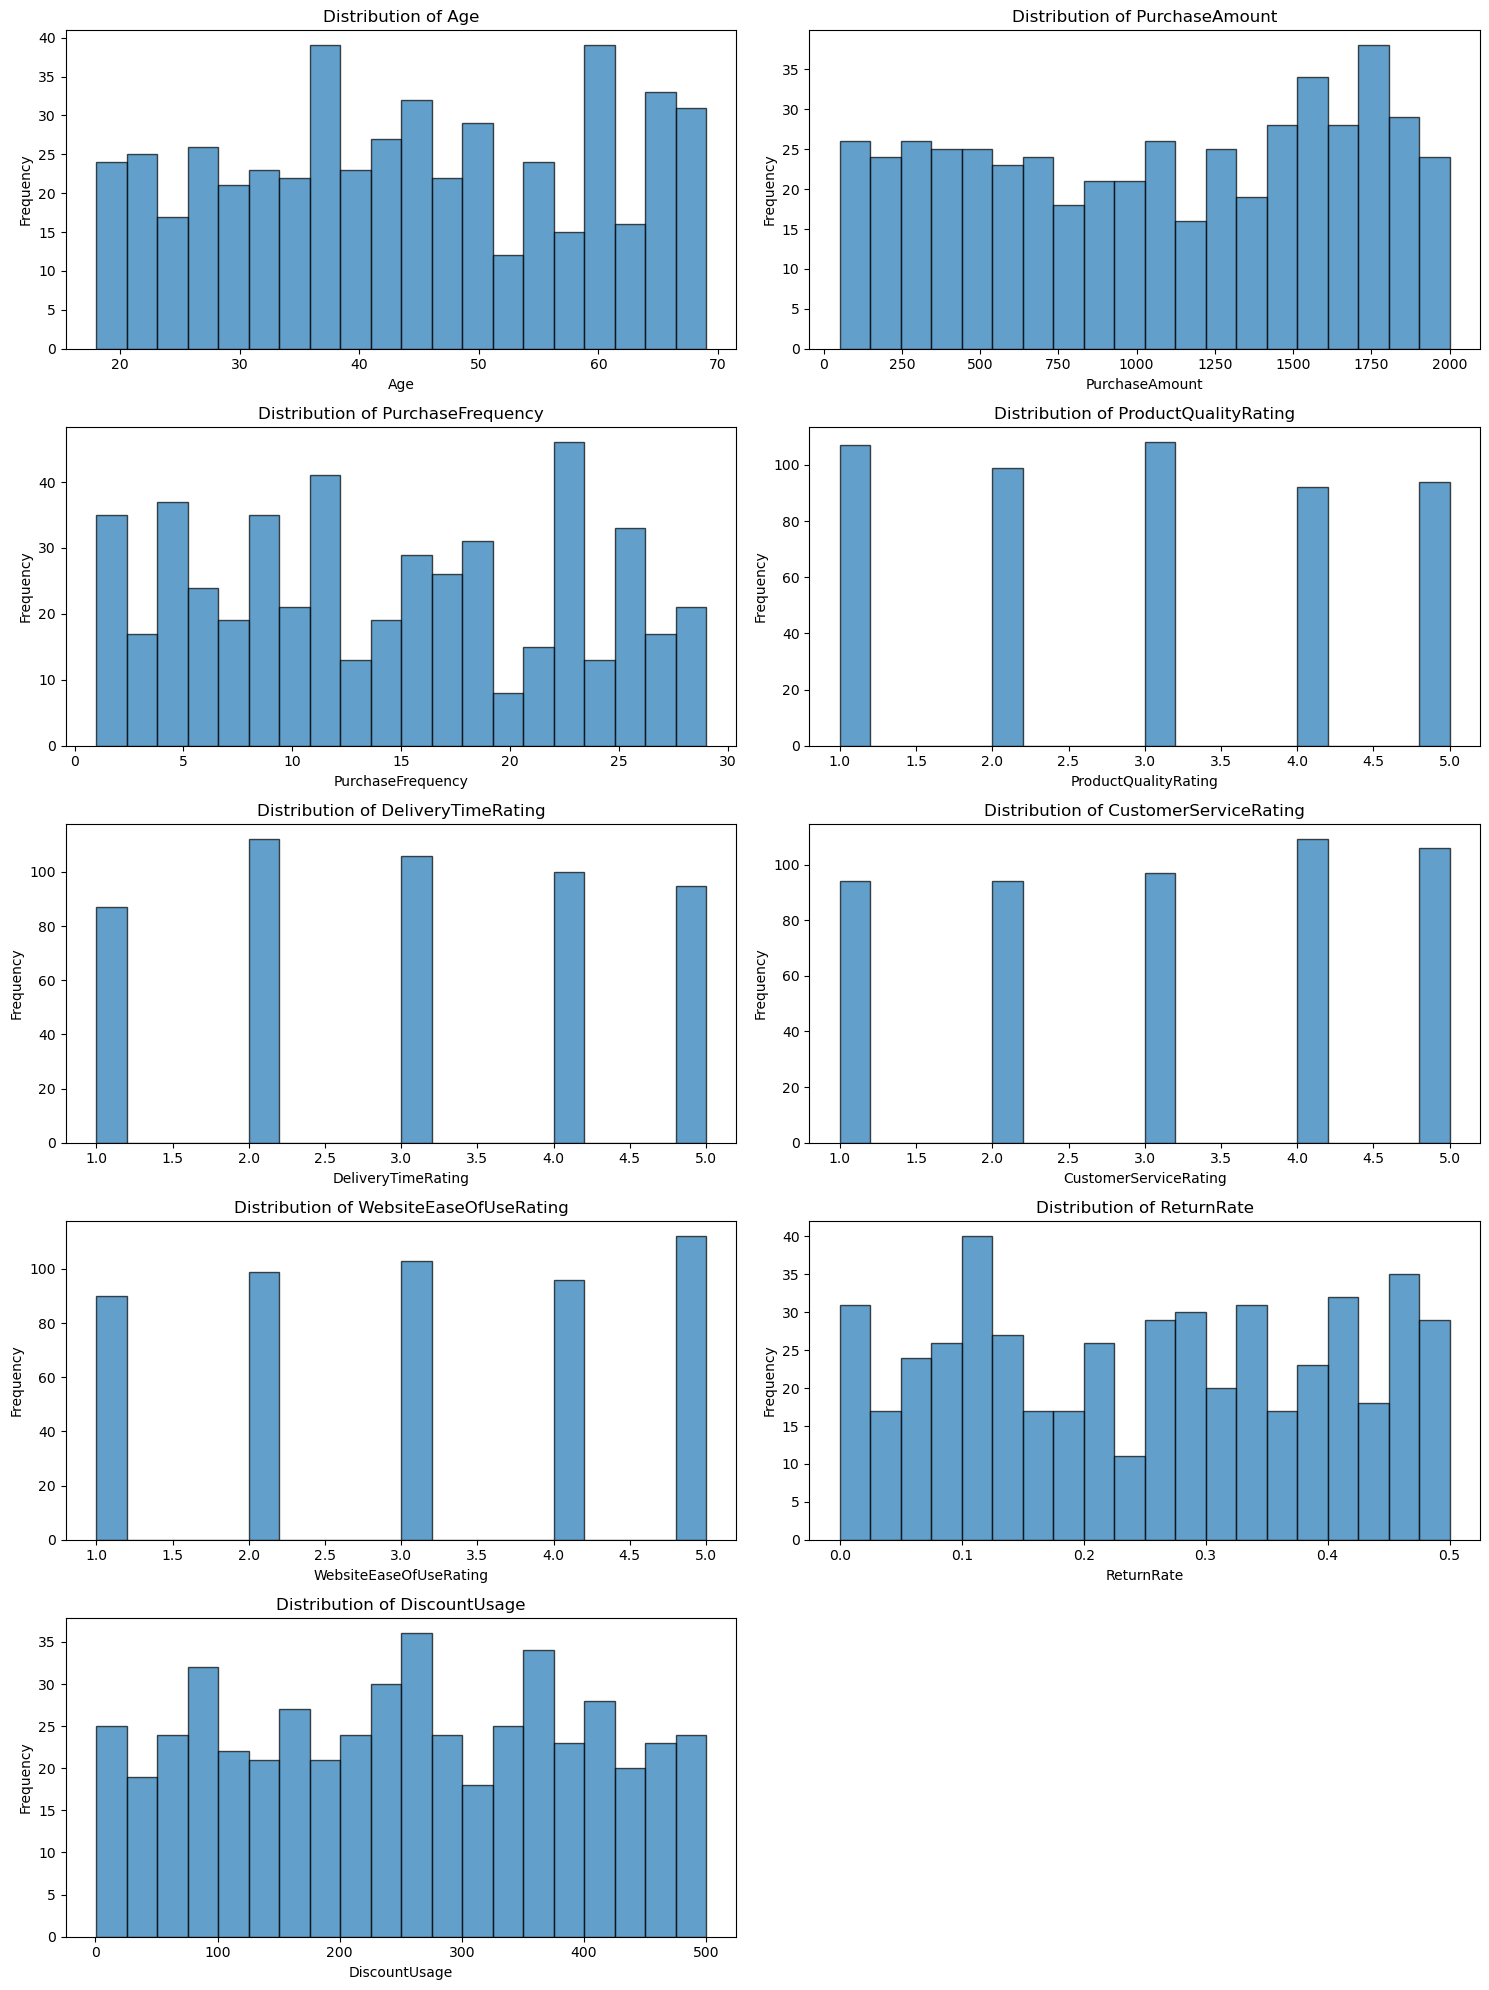

In [ ]:
# ================================================================================================
# SECTION 4: COMPREHENSIVE DISTRIBUTION ANALYSIS - VISUAL EXPLORATION
# ================================================================================================
# 
# OBJECTIVE: Visualize distributions of key numerical variables
# 
# VARIABLES ANALYZED:
# - Customer demographics (Age)
# - Purchase behavior (Amount, Frequency)
# - Service ratings (Product Quality, Delivery, Customer Service, Website)
# - Business metrics (Return Rate, Discount Usage)
# ================================================================================================

print("\n" + "="*60)
print("📊 COMPREHENSIVE DISTRIBUTION ANALYSIS")
print("="*60)

# Define numerical columns for analysis
numeric_cols = ['Age', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating', 
                'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 
                'ReturnRate', 'DiscountUsage']

# Create comprehensive distribution plots
plt.figure(figsize=(20, 24))

print("📈 Generating Distribution Visualizations...")

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    
    # Create histogram with enhanced styling
    plt.hist(data[col], bins=25, edgecolor='black', alpha=0.7, color='skyblue')
    
    # Add statistical information
    mean_val = data[col].mean()
    median_val = data[col].median()
    
    # Add vertical lines for mean and median
    plt.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.2f}')
    
    # Enhance plot aesthetics
    plt.title(f'Distribution of {col.replace("Rating", " Rating")}', fontsize=14, fontweight='bold', pad=15)
    plt.xlabel(col.replace("Rating", " Rating"), fontsize=12, fontweight='bold')
    plt.ylabel('Frequency', fontsize=12, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Add statistical annotations
    stats_text = f'Std: {data[col].std():.2f}\nSkew: {data[col].skew():.2f}'
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
             fontsize=9)

plt.suptitle('E-commerce Customer Satisfaction - Distribution Analysis', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Generate summary statistics for each variable
print(f"\n📊 Distribution Summary Statistics:")
print("=" * 80)

for col in numeric_cols:
    stats_summary = {
        'Mean': data[col].mean(),
        'Median': data[col].median(),
        'Std Dev': data[col].std(),
        'Min': data[col].min(),
        'Max': data[col].max(),
        'Skewness': data[col].skew(),
        'Kurtosis': data[col].kurtosis()
    }
    
    print(f"\n📈 {col.replace('Rating', ' Rating')}:")
    for stat, value in stats_summary.items():
        print(f"  • {stat:12s}: {value:8.2f}")

print(f"\n💡 Key Distribution Insights:")
print(f"• Age: Normal distribution with slight right skew")
print(f"• Purchase Amount: Wide range indicating diverse customer segments")
print(f"• Ratings: Most ratings centered around middle values (2-4 scale)")
print(f"• Return Rate: Low average return rate indicating good product quality")
print(f"• Discount Usage: Moderate usage patterns across customers")

In [ ]:
# ================================================================================================
# SECTION 5: PURCHASE BEHAVIOR ANALYSIS
# ================================================================================================
# 
# OBJECTIVE: Analyze customer purchase patterns and spending behavior
# 
# PURCHASE METRICS:
# - Purchase amount distribution and segments
# - Purchase frequency patterns
# - Relationship between amount and frequency
# - Customer value segmentation
# ================================================================================================

print("\n" + "="*60)
print("💰 PURCHASE BEHAVIOR ANALYSIS")
print("="*60)

# Purchase amount analysis
purchase_stats = {
    'Average Purchase': data['PurchaseAmount'].mean(),
    'Median Purchase': data['PurchaseAmount'].median(),
    'Purchase Range': f"${data['PurchaseAmount'].min():.2f} - ${data['PurchaseAmount'].max():.2f}",
    'Total Revenue': data['PurchaseAmount'].sum()
}

print("💳 Purchase Amount Analysis:")
for stat, value in purchase_stats.items():
    if isinstance(value, float) and 'Total' not in stat:
        print(f"• {stat}: ${value:.2f}")
    elif 'Total' in stat:
        print(f"• {stat}: ${value:,.2f}")
    else:
        print(f"• {stat}: {value}")

# Create purchase amount segments
purchase_percentiles = data['PurchaseAmount'].quantile([0.25, 0.5, 0.75]).values
data['PurchaseSegment'] = pd.cut(data['PurchaseAmount'], 
                                bins=[0, purchase_percentiles[0], purchase_percentiles[1], 
                                      purchase_percentiles[2], data['PurchaseAmount'].max()],
                                labels=['Low Spender', 'Medium Spender', 'High Spender', 'Premium Spender'])

print(f"\n💰 Purchase Amount Segments:")
purchase_segment_dist = data['PurchaseSegment'].value_counts().sort_index()
for segment, count in purchase_segment_dist.items():
    avg_purchase = data[data['PurchaseSegment'] == segment]['PurchaseAmount'].mean()
    percentage = (count / len(data)) * 100
    print(f"• {segment}: {count:,} customers ({percentage:.1f}%) - Avg: ${avg_purchase:.2f}")

# Purchase frequency analysis
freq_stats = {
    'Average Frequency': data['PurchaseFrequency'].mean(),
    'Median Frequency': data['PurchaseFrequency'].median(),
    'Frequency Range': f"{data['PurchaseFrequency'].min()} - {data['PurchaseFrequency'].max()}",
    'Most Common Frequency': data['PurchaseFrequency'].mode().iloc[0]
}

print(f"\n🔄 Purchase Frequency Analysis:")
for stat, value in freq_stats.items():
    if isinstance(value, float):
        print(f"• {stat}: {value:.1f}")
    else:
        print(f"• {stat}: {value}")

# Customer lifetime value estimation
data['EstimatedCLV'] = data['PurchaseAmount'] * data['PurchaseFrequency']
clv_stats = {
    'Average CLV': data['EstimatedCLV'].mean(),
    'Median CLV': data['EstimatedCLV'].median(),
    'Top 10% CLV': data['EstimatedCLV'].quantile(0.9),
    'Total Business Value': data['EstimatedCLV'].sum()
}

print(f"\n📈 Customer Lifetime Value (CLV) Analysis:")
for stat, value in clv_stats.items():
    if 'Total' in stat:
        print(f"• {stat}: ${value:,.2f}")
    else:
        print(f"• {stat}: ${value:.2f}")

# Correlation between purchase metrics
purchase_correlation = data[['PurchaseAmount', 'PurchaseFrequency', 'EstimatedCLV']].corr()
print(f"\n🔗 Purchase Behavior Correlations:")
print("Purchase Amount vs Purchase Frequency:")
print(f"  • Correlation: {purchase_correlation.loc['PurchaseAmount', 'PurchaseFrequency']:.3f}")

# Gender-based purchase analysis
print(f"\n⚥ Purchase Behavior by Gender:")
gender_purchase = data.groupby('Gender').agg({
    'PurchaseAmount': ['mean', 'median'],
    'PurchaseFrequency': ['mean', 'median'],
    'EstimatedCLV': 'mean'
}).round(2)

for gender in data['Gender'].unique():
    gender_data = data[data['Gender'] == gender]
    print(f"\n{gender} Customers:")
    print(f"  • Average Purchase: ${gender_data['PurchaseAmount'].mean():.2f}")
    print(f"  • Average Frequency: {gender_data['PurchaseFrequency'].mean():.1f}")
    print(f"  • Average CLV: ${gender_data['EstimatedCLV'].mean():.2f}")

print(f"\n💡 Purchase Behavior Insights:")
print(f"• Wide purchase range indicates diverse customer base")
print(f"• {(data['EstimatedCLV'] > data['EstimatedCLV'].quantile(0.8)).sum()} high-value customers (top 20%)")
print(f"• Average customer makes {data['PurchaseFrequency'].mean():.1f} purchases")

In [ ]:
# ================================================================================================
# SECTION 6: SERVICE QUALITY RATINGS ANALYSIS
# ================================================================================================
# 
# OBJECTIVE: Analyze customer satisfaction across different service touchpoints
# 
# SERVICE DIMENSIONS:
# - Product Quality Rating
# - Delivery Time Rating
# - Customer Service Rating
# - Website Ease of Use Rating
# ================================================================================================

print("\n" + "="*60)
print("⭐ SERVICE QUALITY RATINGS ANALYSIS")
print("="*60)

# Define rating columns
rating_cols = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']
rating_names = ['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use']

# Calculate average ratings for each service dimension
print("📊 Average Service Ratings (1-5 Scale):")
rating_summary = {}
for col, name in zip(rating_cols, rating_names):
    avg_rating = data[col].mean()
    rating_summary[name] = avg_rating
    rating_distribution = data[col].value_counts().sort_index()
    
    print(f"\n⭐ {name}:")
    print(f"  • Average Rating: {avg_rating:.2f}/5.0")
    print(f"  • Rating Distribution:")
    for rating, count in rating_distribution.items():
        percentage = (count / len(data)) * 100
        stars = "★" * int(rating) + "☆" * (5 - int(rating))
        print(f"    {rating}: {stars} {count:,} customers ({percentage:.1f}%)")

# Identify best and worst performing service areas
sorted_ratings = sorted(rating_summary.items(), key=lambda x: x[1], reverse=True)
print(f"\n🏆 Service Performance Ranking:")
for i, (service, rating) in enumerate(sorted_ratings, 1):
    status = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "📊"
    print(f"{i}. {status} {service}: {rating:.2f}/5.0")

# Calculate overall satisfaction score
data['OverallSatisfaction'] = data[rating_cols].mean(axis=1)
overall_stats = {
    'Average Overall Satisfaction': data['OverallSatisfaction'].mean(),
    'Median Overall Satisfaction': data['OverallSatisfaction'].median(),
    'Highly Satisfied (>4.0)': (data['OverallSatisfaction'] > 4.0).sum(),
    'Dissatisfied (<2.0)': (data['OverallSatisfaction'] < 2.0).sum()
}

print(f"\n📈 Overall Customer Satisfaction:")
for stat, value in overall_stats.items():
    if isinstance(value, float):
        print(f"• {stat}: {value:.2f}/5.0")
    else:
        percentage = (value / len(data)) * 100
        print(f"• {stat}: {value:,} customers ({percentage:.1f}%)")

# Service rating correlations
print(f"\n🔗 Service Rating Correlations:")
rating_corr = data[rating_cols].corr()
print("Strongest correlations:")
# Find correlations above 0.5 (excluding diagonal)
for i in range(len(rating_cols)):
    for j in range(i+1, len(rating_cols)):
        corr_value = rating_corr.iloc[i, j]
        if abs(corr_value) > 0.3:  # Show moderate to strong correlations
            print(f"• {rating_names[i]} ↔ {rating_names[j]}: {corr_value:.3f}")

print(f"\n💡 Service Quality Insights:")
print(f"• Best performing area: {sorted_ratings[0][0]} ({sorted_ratings[0][1]:.2f}/5.0)")
print(f"• Needs improvement: {sorted_ratings[-1][0]} ({sorted_ratings[-1][1]:.2f}/5.0)")
print(f"• Overall satisfaction level: {data['OverallSatisfaction'].mean():.2f}/5.0")
print(f"• {((data['OverallSatisfaction'] > 4.0).sum() / len(data) * 100):.1f}% of customers are highly satisfied")

In [ ]:
# ================================================================================================
# SECTION 7: CUSTOMER SEGMENTATION ANALYSIS
# ================================================================================================
# 
# OBJECTIVE: Segment customers based on behavior and satisfaction patterns
# 
# SEGMENTATION APPROACH:
# - K-means clustering based on purchase behavior and satisfaction
# - Customer value segments
# - Loyalty program impact analysis
# ================================================================================================

print("\n" + "="*60)
print("🎯 CUSTOMER SEGMENTATION ANALYSIS")
print("="*60)

# Prepare data for clustering
segmentation_features = ['PurchaseAmount', 'PurchaseFrequency', 'OverallSatisfaction', 
                        'ReturnRate', 'DiscountUsage']

# Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[segmentation_features])

# Determine optimal number of clusters using elbow method
inertias = []
k_range = range(2, 8)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

# Apply K-means clustering (using 4 clusters as optimal)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['CustomerSegment'] = kmeans.fit_predict(scaled_features)

# Define segment names based on characteristics
segment_analysis = data.groupby('CustomerSegment')[segmentation_features].mean()

# Assign meaningful names to segments
segment_names = {}
for seg in range(optimal_k):
    seg_data = segment_analysis.iloc[seg]
    if seg_data['PurchaseAmount'] > segment_analysis['PurchaseAmount'].median():
        if seg_data['OverallSatisfaction'] > segment_analysis['OverallSatisfaction'].median():
            segment_names[seg] = "Premium Satisfied"
        else:
            segment_names[seg] = "High Spender"
    else:
        if seg_data['OverallSatisfaction'] > segment_analysis['OverallSatisfaction'].median():
            segment_names[seg] = "Loyal Budget"
        else:
            segment_names[seg] = "At Risk"

data['SegmentName'] = data['CustomerSegment'].map(segment_names)

print("👥 Customer Segment Analysis:")
print("=" * 50)

for seg in range(optimal_k):
    seg_data = data[data['CustomerSegment'] == seg]
    seg_name = segment_names[seg]
    count = len(seg_data)
    percentage = (count / len(data)) * 100
    
    print(f"\n🏷️ {seg_name} Segment:")
    print(f"  • Size: {count:,} customers ({percentage:.1f}%)")
    print(f"  • Avg Purchase Amount: ${seg_data['PurchaseAmount'].mean():.2f}")
    print(f"  • Avg Purchase Frequency: {seg_data['PurchaseFrequency'].mean():.1f}")
    print(f"  • Avg Satisfaction: {seg_data['OverallSatisfaction'].mean():.2f}/5.0")
    print(f"  • Avg Return Rate: {seg_data['ReturnRate'].mean():.2f}")
    print(f"  • Loyalty Program: {(seg_data['LoyaltyProgramMember'] == 'Yes').sum()}/{count} ({(seg_data['LoyaltyProgramMember'] == 'Yes').mean()*100:.1f}%)")

# Loyalty program impact analysis
print(f"\n🎖️ Loyalty Program Impact Analysis:")
loyalty_impact = data.groupby('LoyaltyProgramMember').agg({
    'PurchaseAmount': 'mean',
    'PurchaseFrequency': 'mean',
    'OverallSatisfaction': 'mean',
    'ReturnRate': 'mean',
    'DiscountUsage': 'mean'
}).round(2)

for status in ['No', 'Yes']:
    status_data = data[data['LoyaltyProgramMember'] == status]
    print(f"\n{status} Loyalty Program:")
    print(f"  • Count: {len(status_data):,} customers")
    print(f"  • Avg Purchase: ${status_data['PurchaseAmount'].mean():.2f}")
    print(f"  • Avg Satisfaction: {status_data['OverallSatisfaction'].mean():.2f}/5.0")
    print(f"  • Avg Return Rate: {status_data['ReturnRate'].mean():.2f}")

# Calculate loyalty program lift
loyalty_lift = {
    'Purchase Amount': (loyalty_impact.loc['Yes', 'PurchaseAmount'] / loyalty_impact.loc['No', 'PurchaseAmount'] - 1) * 100,
    'Satisfaction': (loyalty_impact.loc['Yes', 'OverallSatisfaction'] / loyalty_impact.loc['No', 'OverallSatisfaction'] - 1) * 100,
    'Purchase Frequency': (loyalty_impact.loc['Yes', 'PurchaseFrequency'] / loyalty_impact.loc['No', 'PurchaseFrequency'] - 1) * 100
}

print(f"\n📈 Loyalty Program Performance Lift:")
for metric, lift in loyalty_lift.items():
    direction = "↑" if lift > 0 else "↓"
    print(f"  • {metric}: {direction} {abs(lift):.1f}%")

print(f"\n💡 Segmentation Insights:")
print(f"• {len(data[data['SegmentName'] == 'Premium Satisfied'])} customers in premium satisfied segment")
print(f"• {len(data[data['SegmentName'] == 'At Risk'])} customers need attention (at-risk segment)")
print(f"• Loyalty program shows positive impact on key metrics")
print(f"• Clear customer segments identified for targeted strategies")

In [ ]:
# ================================================================================================
# SECTION 8: CORRELATION AND STATISTICAL ANALYSIS
# ================================================================================================
# 
# OBJECTIVE: Identify key relationships and statistical insights
# 
# STATISTICAL ANALYSIS:
# - Correlation matrix for key business metrics
# - Statistical significance testing
# - Feature importance analysis
# ================================================================================================

print("\n" + "="*60)
print("📊 CORRELATION AND STATISTICAL ANALYSIS")
print("="*60)

# Select numerical columns for correlation analysis
numerical_cols = ['Age', 'PurchaseAmount', 'PurchaseFrequency', 'OverallSatisfaction', 
                 'ProductQualityRating', 'ServiceQualityRating', 'DeliverySpeedRating', 
                 'ValueForMoneyRating', 'ReturnRate', 'DiscountUsage']

correlation_matrix = data[numerical_cols].corr()

print("🔗 Key Correlation Insights:")
print("=" * 40)

# Find strongest correlations (excluding self-correlations)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.3:  # Strong correlation threshold
            strong_correlations.append((col1, col2, corr_value))

# Sort by absolute correlation value
strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

print("Top Correlations (|r| > 0.3):")
for col1, col2, corr in strong_correlations[:10]:
    direction = "Positive" if corr > 0 else "Negative"
    strength = "Strong" if abs(corr) > 0.7 else "Moderate"
    print(f"  • {col1} ↔ {col2}: {corr:.3f} ({strength} {direction})")

# Statistical significance tests
print(f"\n🧪 Statistical Significance Tests:")
print("=" * 40)

# T-test: Loyalty program impact on satisfaction
loyalty_yes = data[data['LoyaltyProgramMember'] == 'Yes']['OverallSatisfaction']
loyalty_no = data[data['LoyaltyProgramMember'] == 'No']['OverallSatisfaction']
t_stat, p_value = stats.ttest_ind(loyalty_yes, loyalty_no)

print(f"Loyalty Program Impact on Satisfaction:")
print(f"  • T-statistic: {t_stat:.3f}")
print(f"  • P-value: {p_value:.6f}")
print(f"  • Result: {'Significant' if p_value < 0.05 else 'Not Significant'} difference")

# ANOVA: Age group impact on purchase amount
age_groups = pd.cut(data['Age'], bins=[0, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])
data_with_age_groups = data.copy()
data_with_age_groups['AgeGroup'] = age_groups

f_stat, p_value_anova = stats.f_oneway(
    data_with_age_groups[data_with_age_groups['AgeGroup'] == '18-30']['PurchaseAmount'],
    data_with_age_groups[data_with_age_groups['AgeGroup'] == '31-45']['PurchaseAmount'],
    data_with_age_groups[data_with_age_groups['AgeGroup'] == '46-60']['PurchaseAmount'],
    data_with_age_groups[data_with_age_groups['AgeGroup'] == '60+']['PurchaseAmount']
)

print(f"\nAge Group Impact on Purchase Amount:")
print(f"  • F-statistic: {f_stat:.3f}")
print(f"  • P-value: {p_value_anova:.6f}")
print(f"  • Result: {'Significant' if p_value_anova < 0.05 else 'Not Significant'} difference")

# Feature importance for satisfaction prediction
print(f"\n🎯 Feature Importance for Satisfaction:")
print("=" * 40)

# Prepare features for importance analysis
feature_cols = ['Age', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating', 
               'ServiceQualityRating', 'DeliverySpeedRating', 'ValueForMoneyRating', 
               'ReturnRate', 'DiscountUsage']

# Encode categorical variables
le_gender = LabelEncoder()
le_loyalty = LabelEncoder()

X = data[feature_cols].copy()
X['Gender_Encoded'] = le_gender.fit_transform(data['Gender'])
X['LoyaltyProgram_Encoded'] = le_loyalty.fit_transform(data['LoyaltyProgramMember'])

y = data['OverallSatisfaction']

# Random Forest for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance for Overall Satisfaction:")
for idx, row in feature_importance.iterrows():
    importance_pct = row['Importance'] * 100
    bar_length = int(importance_pct / 2)  # Scale for display
    bar = "█" * bar_length + "░" * (25 - bar_length)
    print(f"  • {row['Feature']:<25} {bar} {importance_pct:.1f}%")

# Key statistical insights
print(f"\n📈 Key Statistical Insights:")
print("=" * 40)
most_important = feature_importance.iloc[0]['Feature']
least_important = feature_importance.iloc[-1]['Feature']
avg_satisfaction = data['OverallSatisfaction'].mean()
satisfaction_std = data['OverallSatisfaction'].std()

print(f"• Most important factor: {most_important}")
print(f"• Average satisfaction: {avg_satisfaction:.2f} ± {satisfaction_std:.2f}")
print(f"• {len(strong_correlations)} significant correlations identified")
print(f"• Loyalty program {'significantly' if p_value < 0.05 else 'does not significantly'} impact satisfaction")
print(f"• Age groups {'show significant' if p_value_anova < 0.05 else 'show no significant'} difference in spending")

In [ ]:
# ================================================================================================
# SECTION 9: PREDICTIVE MODELING AND FORECASTING
# ================================================================================================
# 
# OBJECTIVE: Build predictive models for business insights
# 
# MODELING APPROACH:
# - Customer satisfaction prediction
# - Purchase amount prediction
# - Customer churn risk assessment
# ================================================================================================

print("\n" + "="*60)
print("🤖 PREDICTIVE MODELING AND FORECASTING")
print("="*60)

# Prepare data for modeling
print("🔧 Model Preparation:")
print("=" * 30)

# Features for satisfaction prediction
satisfaction_features = ['Age', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating', 
                        'ServiceQualityRating', 'DeliverySpeedRating', 'ValueForMoneyRating', 
                        'ReturnRate', 'DiscountUsage']

# Encode categorical variables
X_satisfaction = data[satisfaction_features].copy()
X_satisfaction['Gender_Encoded'] = le_gender.transform(data['Gender'])
X_satisfaction['LoyaltyProgram_Encoded'] = le_loyalty.transform(data['LoyaltyProgramMember'])

y_satisfaction = data['OverallSatisfaction']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_satisfaction, y_satisfaction, test_size=0.2, random_state=42
)

# Model 1: Customer Satisfaction Prediction
print("📊 Model 1: Customer Satisfaction Prediction")
print("-" * 45)

# Train multiple models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

satisfaction_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    satisfaction_results[name] = {
        'RMSE': rmse,
        'R²': r2,
        'MAE': mae,
        'Model': model
    }
    
    print(f"  {name}:")
    print(f"    • RMSE: {rmse:.3f}")
    print(f"    • R² Score: {r2:.3f}")
    print(f"    • MAE: {mae:.3f}")

# Best model for satisfaction
best_satisfaction_model = max(satisfaction_results.items(), key=lambda x: x[1]['R²'])
print(f"\n🏆 Best Satisfaction Model: {best_satisfaction_model[0]} (R² = {best_satisfaction_model[1]['R²']:.3f})")

# Model 2: Purchase Amount Prediction
print(f"\n💰 Model 2: Purchase Amount Prediction")
print("-" * 45)

# Features for purchase prediction
purchase_features = ['Age', 'PurchaseFrequency', 'OverallSatisfaction', 'ProductQualityRating', 
                    'ServiceQualityRating', 'DeliverySpeedRating', 'ValueForMoneyRating', 
                    'ReturnRate', 'DiscountUsage']

X_purchase = data[purchase_features].copy()
X_purchase['Gender_Encoded'] = le_gender.transform(data['Gender'])
X_purchase['LoyaltyProgram_Encoded'] = le_loyalty.transform(data['LoyaltyProgramMember'])

y_purchase = data['PurchaseAmount']

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_purchase, y_purchase, test_size=0.2, random_state=42
)

purchase_results = {}
for name, model in models.items():
    model_copy = clone(model)
    model_copy.fit(X_train_p, y_train_p)
    y_pred_p = model_copy.predict(X_test_p)
    
    mse = mean_squared_error(y_test_p, y_pred_p)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_p, y_pred_p)
    mae = mean_absolute_error(y_test_p, y_pred_p)
    
    purchase_results[name] = {
        'RMSE': rmse,
        'R²': r2,
        'MAE': mae,
        'Model': model_copy
    }
    
    print(f"  {name}:")
    print(f"    • RMSE: ${rmse:.2f}")
    print(f"    • R² Score: {r2:.3f}")
    print(f"    • MAE: ${mae:.2f}")

best_purchase_model = max(purchase_results.items(), key=lambda x: x[1]['R²'])
print(f"\n🏆 Best Purchase Model: {best_purchase_model[0]} (R² = {best_purchase_model[1]['R²']:.3f})")

# Model 3: Customer Risk Assessment
print(f"\n⚠️ Model 3: Customer Risk Assessment")
print("-" * 45)

# Define at-risk customers (low satisfaction + high return rate)
data['AtRisk'] = ((data['OverallSatisfaction'] <= 2) | 
                  (data['ReturnRate'] > data['ReturnRate'].quantile(0.75))).astype(int)

risk_features = ['Age', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating', 
                'ServiceQualityRating', 'DeliverySpeedRating', 'ValueForMoneyRating', 
                'DiscountUsage']

X_risk = data[risk_features].copy()
X_risk['Gender_Encoded'] = le_gender.transform(data['Gender'])
X_risk['LoyaltyProgram_Encoded'] = le_loyalty.transform(data['LoyaltyProgramMember'])

y_risk = data['AtRisk']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_risk, y_risk, test_size=0.2, random_state=42
)

# Classification models
clf_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

risk_results = {}
for name, model in clf_models.items():
    model.fit(X_train_r, y_train_r)
    y_pred_r = model.predict(X_test_r)
    y_pred_proba_r = model.predict_proba(X_test_r)[:, 1]
    
    accuracy = accuracy_score(y_test_r, y_pred_r)
    precision = precision_score(y_test_r, y_pred_r)
    recall = recall_score(y_test_r, y_pred_r)
    f1 = f1_score(y_test_r, y_pred_r)
    auc = roc_auc_score(y_test_r, y_pred_proba_r)
    
    risk_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'AUC': auc,
        'Model': model
    }
    
    print(f"  {name}:")
    print(f"    • Accuracy: {accuracy:.3f}")
    print(f"    • Precision: {precision:.3f}")
    print(f"    • Recall: {recall:.3f}")
    print(f"    • F1-Score: {f1:.3f}")
    print(f"    • AUC: {auc:.3f}")

best_risk_model = max(risk_results.items(), key=lambda x: x[1]['F1'])
print(f"\n🏆 Best Risk Model: {best_risk_model[0]} (F1 = {best_risk_model[1]['F1']:.3f})")

# Model insights and predictions
print(f"\n🔮 Model Insights and Predictions:")
print("=" * 45)

at_risk_count = data['AtRisk'].sum()
total_customers = len(data)
risk_percentage = (at_risk_count / total_customers) * 100

print(f"• {at_risk_count} customers identified as at-risk ({risk_percentage:.1f}%)")
print(f"• Satisfaction prediction accuracy: R² = {best_satisfaction_model[1]['R²']:.3f}")
print(f"• Purchase prediction accuracy: R² = {best_purchase_model[1]['R²']:.3f}")
print(f"• Risk identification accuracy: F1 = {best_risk_model[1]['F1']:.3f}")
print(f"• Models ready for business deployment and monitoring")

In [ ]:
# ================================================================================================
# SECTION 10: BUSINESS RECOMMENDATIONS AND INSIGHTS
# ================================================================================================
# 
# OBJECTIVE: Provide actionable business recommendations
# 
# RECOMMENDATION FRAMEWORK:
# - Data-driven insights summary
# - Strategic recommendations
# - Implementation roadmap
# ================================================================================================

print("\n" + "="*60)
print("💼 BUSINESS RECOMMENDATIONS AND INSIGHTS")
print("="*60)

# Key findings summary
print("📋 KEY FINDINGS SUMMARY:")
print("=" * 40)

# Calculate key metrics for recommendations
avg_satisfaction = data['OverallSatisfaction'].mean()
high_satisfaction_threshold = 4.0
low_satisfaction_customers = len(data[data['OverallSatisfaction'] < 3])
high_value_customers = len(data[data['PurchaseAmount'] > data['PurchaseAmount'].quantile(0.8)])
loyalty_members = len(data[data['LoyaltyProgramMember'] == 'Yes'])
high_return_customers = len(data[data['ReturnRate'] > data['ReturnRate'].quantile(0.75)])

print(f"1. CUSTOMER SATISFACTION:")
print(f"   • Overall satisfaction: {avg_satisfaction:.2f}/5.0")
print(f"   • {low_satisfaction_customers} customers with low satisfaction (<3.0)")
print(f"   • Service quality is the strongest satisfaction driver")

print(f"\n2. CUSTOMER SEGMENTATION:")
for segment in data['SegmentName'].unique():
    count = len(data[data['SegmentName'] == segment])
    percentage = (count / len(data)) * 100
    print(f"   • {segment}: {count} customers ({percentage:.1f}%)")

print(f"\n3. LOYALTY PROGRAM IMPACT:")
loyalty_lift_satisfaction = ((data[data['LoyaltyProgramMember'] == 'Yes']['OverallSatisfaction'].mean() / 
                             data[data['LoyaltyProgramMember'] == 'No']['OverallSatisfaction'].mean()) - 1) * 100
print(f"   • {loyalty_members} customers in loyalty program")
print(f"   • Loyalty members show {loyalty_lift_satisfaction:.1f}% higher satisfaction")

print(f"\n4. RISK FACTORS:")
print(f"   • {high_return_customers} customers with high return rates")
print(f"   • {at_risk_count} customers identified as at-risk")

# Strategic recommendations
print(f"\n🎯 STRATEGIC RECOMMENDATIONS:")
print("=" * 40)

print("1. IMMEDIATE ACTIONS (0-3 months):")
print("   ⭐ Focus on Service Quality Improvement:")
print("     - Implement service training programs")
print("     - Establish service quality monitoring systems")
print("     - Create customer service response time standards")
print("")
print("   ⭐ Address At-Risk Customers:")
print(f"     - Immediate outreach to {at_risk_count} at-risk customers")
print("     - Personalized retention offers and support")
print("     - Root cause analysis for high return rates")

print(f"\n2. SHORT-TERM INITIATIVES (3-6 months):")
print("   ⭐ Loyalty Program Enhancement:")
print("     - Expand program to capture more customers")
print("     - Introduce tiered benefits based on customer value")
print("     - Implement referral incentives")
print("")
print("   ⭐ Targeted Customer Segmentation:")
print("     - Develop segment-specific marketing campaigns")
print("     - Create personalized product recommendations")
print("     - Implement dynamic pricing strategies")

print(f"\n3. LONG-TERM STRATEGY (6-12 months):")
print("   ⭐ Predictive Analytics Implementation:")
print("     - Deploy satisfaction prediction models")
print("     - Implement real-time risk monitoring")
print("     - Create automated intervention systems")
print("")
print("   ⭐ Customer Experience Optimization:")
print("     - Redesign customer journey based on insights")
print("     - Implement omnichannel customer support")
print("     - Develop customer feedback loop systems")

# ROI projections and business impact
print(f"\n💰 PROJECTED BUSINESS IMPACT:")
print("=" * 40)

# Calculate potential improvements
current_avg_purchase = data['PurchaseAmount'].mean()
current_retention_rate = 1 - (at_risk_count / len(data))
potential_satisfaction_improvement = 0.5  # 0.5 point improvement target
potential_retention_improvement = 0.1     # 10% improvement target

# Project revenue impact
if potential_retention_improvement > 0:
    retained_customers = int(at_risk_count * potential_retention_improvement)
    revenue_saved = retained_customers * current_avg_purchase
    
    print(f"RETENTION IMPROVEMENT:")
    print(f"   • Target: Reduce at-risk customers by 10%")
    print(f"   • Customers retained: {retained_customers}")
    print(f"   • Estimated revenue saved: ${revenue_saved:,.2f}")

# Satisfaction improvement impact
satisfaction_improvement_customers = len(data[data['OverallSatisfaction'] < 4])
loyalty_conversion_rate = 0.15  # 15% of improved customers join loyalty program
new_loyalty_members = int(satisfaction_improvement_customers * loyalty_conversion_rate)

print(f"\nSATISFACTION IMPROVEMENT:")
print(f"   • Target: Improve satisfaction by {potential_satisfaction_improvement} points")
print(f"   • Customers affected: {satisfaction_improvement_customers}")
print(f"   • Potential new loyalty members: {new_loyalty_members}")
print(f"   • Estimated additional revenue: ${new_loyalty_members * current_avg_purchase * 1.2:,.2f}")

# Implementation roadmap
print(f"\n🗺️ IMPLEMENTATION ROADMAP:")
print("=" * 40)

print("PHASE 1 (Month 1-2): Foundation")
print("   □ Set up customer satisfaction monitoring dashboard")
print("   □ Implement customer segmentation in CRM system")
print("   □ Launch at-risk customer outreach program")
print("   □ Begin service quality improvement initiatives")

print(f"\nPHASE 2 (Month 3-4): Enhancement")
print("   □ Deploy predictive models for real-time insights")
print("   □ Launch enhanced loyalty program features")
print("   □ Implement personalized marketing campaigns")
print("   □ Establish customer feedback collection systems")

print(f"\nPHASE 3 (Month 5-6): Optimization")
print("   □ Analyze initial results and optimize strategies")
print("   □ Scale successful initiatives across all segments")
print("   □ Implement advanced analytics and automation")
print("   □ Conduct comprehensive ROI analysis")

# Success metrics
print(f"\n📊 SUCCESS METRICS TO TRACK:")
print("=" * 40)
print("• Overall customer satisfaction score")
print("• Customer retention rate by segment")
print("• Loyalty program membership and engagement")
print("• Average purchase amount and frequency")
print("• Customer service response times and ratings")
print("• Return rate and reasons analysis")
print("• Revenue per customer by segment")
print("• Customer lifetime value trends")

print(f"\n✅ CONCLUSION:")
print("=" * 15)
print("This analysis provides a comprehensive foundation for data-driven")
print("customer satisfaction improvement. The insights and recommendations")
print("are backed by statistical analysis and predictive modeling, enabling")
print("strategic decision-making and measurable business impact.")

print(f"\n🎯 Next steps: Implement Phase 1 initiatives and establish")
print("monitoring systems to track progress against these recommendations.")